In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train-dataset/point_date_awt.csv')
train_data.head()

,Time,longitude,latitude,windSpeed,windDirection,RadiationInclinedPlane,RadiationHorizontalPlane,scatteredRadiation,directRadiation,Temperature,Humidity,atmosphericPressure,actualPowerGeneration
0,2018-06-26 17:16:00,79.9155,40.7022,0.0,3.00,895.0,0,340.0,748.0,0.0,0.0,889.0,17.1324
1,2018-04-03 16:06:00,79.9155,40.7022,0.0,3.20,391.0,0,256.0,518.0,0.0,0.0,899.0,9.1508
2,2018-03-05 17:41:00,79.9155,40.7022,0.0,1.04,391.0,0,225.0,414.0,0.0,0.0,900.0,6.7312
3,2018-06-11 09:46:00,79.9155,40.7022,0.0,3.00,895.0,0,340.0,748.0,0.0,0.0,889.0,6.6419
4,2018-04-07 18:06:00,79.9155,40.7022,0.0,2.16,353.0,0,217.0,430.0,0.0,0.0,899.0,6.0085


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51435 entries, 0 to 51434
Data columns (total 13 columns):
Time                        51435 non-null object
longitude                   51435 non-null float64
latitude                    51435 non-null float64
windSpeed                   51435 non-null float64
windDirection               51435 non-null float64
RadiationInclinedPlane      51435 non-null float64
RadiationHorizontalPlane    51435 non-null int64
scatteredRadiation          51435 non-null float64
directRadiation             51435 non-null float64
Temperature                 51435 non-null float64
Humidity                    51435 non-null float64
atmosphericPressure         51435 non-null float64
actualPowerGeneration       51435 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 5.1+ MB


In [4]:
train_data_Y=train_data['actualPowerGeneration']
train_data_X=train_data.drop(axis=1,columns=['actualPowerGeneration'])

C:\Users\endon\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


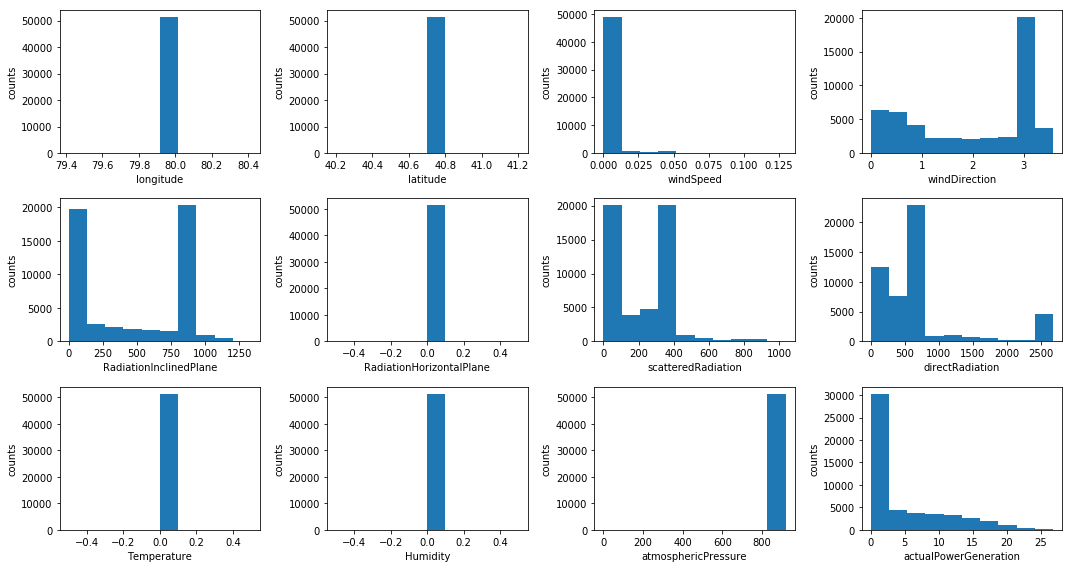

In [5]:
fig,axes = plt.subplots(nrows=3,ncols=4,figsize=(15,8),tight_layout=True)
for ax,col in zip(axes.ravel(),train_data.columns[1:]):
    ax.hist(train_data[col])
    ax.set_ylabel('counts')
    ax.set_xlabel(col)

In [6]:
train_data_X=train_data.drop(axis=1,columns=['longitude','latitude','RadiationHorizontalPlane','Temperature','Humidity','atmosphericPressure'])

In [7]:
train_data_X.columns

Index(['Time', 'windSpeed', 'windDirection', 'RadiationInclinedPlane',
       'scatteredRadiation', 'directRadiation', 'actualPowerGeneration'],
      dtype='object')

In [8]:
from datetime import datetime

In [9]:
train_data_X['year']=pd.to_datetime(train_data_X.Time).dt.year
train_data_X['month']=pd.to_datetime(train_data_X.Time).dt.month
train_data_X['day']=pd.to_datetime(train_data_X.Time).dt.day
train_data_X['hour']=pd.to_datetime(train_data_X.Time).dt.hour
train_data_X['minute']=pd.to_datetime(train_data_X.Time).dt.minute
train_data_X=train_data_X.drop(axis=1,columns=['Time'])

In [10]:
train_data_X.head()

,windSpeed,windDirection,RadiationInclinedPlane,scatteredRadiation,directRadiation,actualPowerGeneration,year,month,day,hour,minute
0,0.0,3.00,895.0,340.0,748.0,17.1324,2018,6,26,17,16
1,0.0,3.20,391.0,256.0,518.0,9.1508,2018,4,3,16,6
2,0.0,1.04,391.0,225.0,414.0,6.7312,2018,3,5,17,41
3,0.0,3.00,895.0,340.0,748.0,6.6419,2018,6,11,9,46
4,0.0,2.16,353.0,217.0,430.0,6.0085,2018,4,7,18,6


C:\Users\endon\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


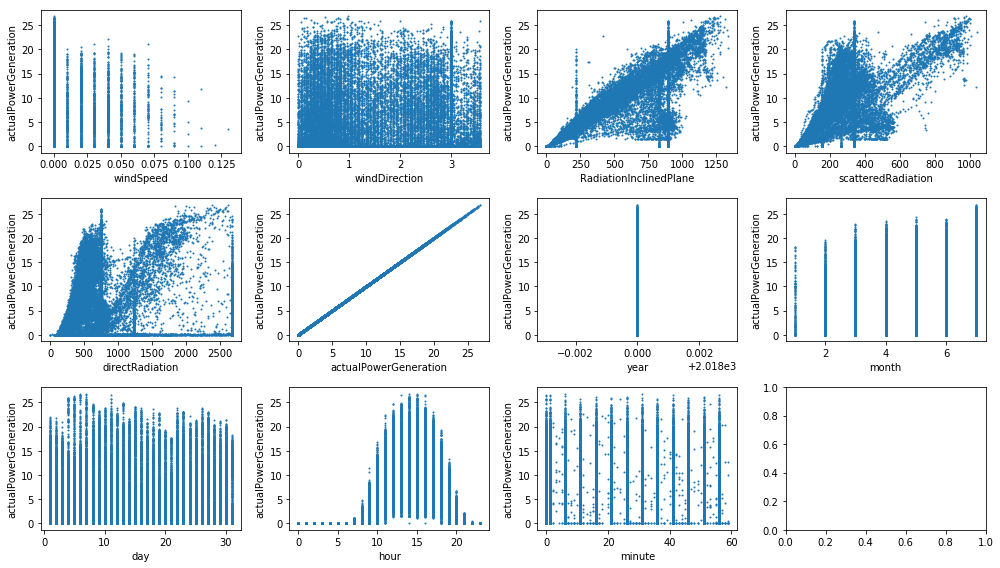

In [11]:
plt.rcParams['lines.markersize']=1

fig,axes = plt.subplots(nrows=3,ncols=4,figsize=(14,8),tight_layout=True)
for ax,col in zip(axes.ravel(),train_data_X.columns):
    ax.scatter(train_data_X[col],train_data_Y)
    ax.set_ylabel('actualPowerGeneration')
    ax.set_xlabel(col)

In [12]:
train_data_X=train_data_X.drop(axis=1,columns=['year','actualPowerGeneration'])

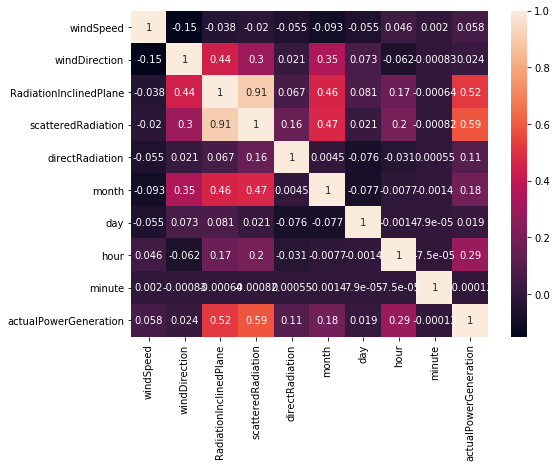

In [13]:
import seaborn as sns

awt_train_data=pd.concat((train_data_X,train_data_Y),axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(awt_train_data.corr(), annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import pca
from sklearn.ensemble import GradientBoostingRegressor

# train_data_X=train_data_X.drop(axis=1,columns=['minute'])

X_train, X_test, Y_train, Y_test = train_test_split(train_data_X, train_data_Y, test_size=0.2, random_state=40)

In [15]:
# myGBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#                                   learning_rate=0.03, loss='huber', max_depth=14,
#                                   max_features='sqrt', max_leaf_nodes=None,
#                                   min_impurity_decrease=0.0, min_impurity_split=None,
#                                   min_samples_leaf=10, min_samples_split=40,
#                                   min_weight_fraction_leaf=0.0, n_estimators=300,
#                                   presort='auto', random_state=10, subsample=0.8, verbose=0,
#                                   warm_start=False)
# myGBR.fit(X_train, Y_train)
# Y_pred = myGBR.predict(X_test)
# print(mean_squared_error(Y_test, Y_pred))

In [16]:
train_data=train_data.sort_values(by='Time')

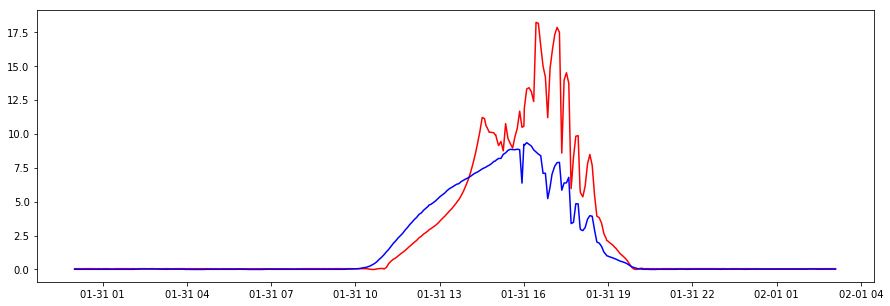

In [17]:
plt.figure(figsize=(15,5))
plt.plot(pd.to_datetime(train_data['Time'])[:360].values,train_data['actualPowerGeneration'][:360].values,c='r')
plt.plot(pd.to_datetime(train_data['Time'])[:360].values,train_data['RadiationInclinedPlane'].apply(lambda x : x/100)[:360].values,c='b')
plt.show()

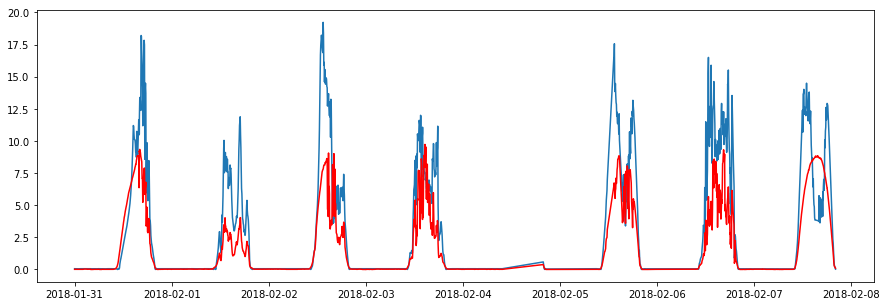

In [18]:
plt.figure(figsize=(15,5))
plt.plot(pd.to_datetime(train_data['Time'])[:2000].values,train_data['actualPowerGeneration'][:2000].values)
plt.plot(pd.to_datetime(train_data['Time'])[:2000].values,train_data['RadiationInclinedPlane'].apply(lambda x : x/100)[:2000].values,c='r')
plt.show()

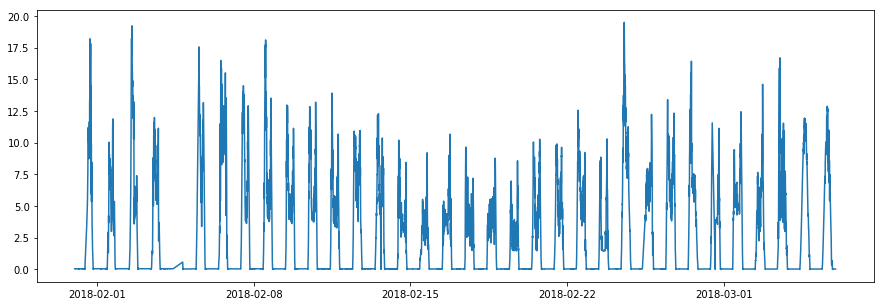

In [19]:
plt.figure(figsize=(15,5))
plt.plot(pd.to_datetime(train_data['Time'])[:10000].values,train_data['actualPowerGeneration'][:10000].values)
plt.show()

In [20]:
from sklearn import linear_model
myLassoR = linear_model.Lasso(alpha=1)

In [21]:
# X_train=pd.concat((X_train['RadiationInclinedPlane'],X_train['hour']),axis=1)

# X_train.head()

In [22]:
myLassoR.fit(X_train,Y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
# X_test1=pd.concat((X_test['RadiationInclinedPlane'],X_test['hour']),axis=1)
myLassoR.score(X_test,Y_test)

0.3774036850672957

In [24]:
Y_pre=myLassoR.predict(X_test)

In [25]:
X_test.head()

,windSpeed,windDirection,RadiationInclinedPlane,scatteredRadiation,directRadiation,month,day,hour,minute
29796,0.0,0.36,77.0,61.0,246.0,5,5,9,1
12765,0.0,0.30,3.0,3.0,2674.0,2,2,9,56
3240,0.0,0.30,1059.0,841.0,1575.0,7,14,13,0
41372,0.0,0.00,0.0,1.0,153.0,4,9,7,0
2745,0.0,0.70,23.0,18.0,686.0,7,5,21,51


In [26]:
Test_show_Y = pd.Series(Y_pre,name='predPowerGeneration',index=X_test.index)

In [27]:
Test_show_X=X_test
Test_show=pd.concat((Test_show_X,Test_show_Y),axis=1)

In [28]:
Test_show_Y1 = pd.Series(Y_test,name='actualPowerGeneration',index=X_test.index)
Test_show=pd.concat((Test_show,Test_show_Y1),axis=1)

In [29]:
Test_show.head()

,windSpeed,windDirection,RadiationInclinedPlane,scatteredRadiation,directRadiation,month,day,hour,minute,predPowerGeneration,actualPowerGeneration
29796,0.0,0.36,77.0,61.0,246.0,5,5,9,1,1.476391,1.5428
12765,0.0,0.30,3.0,3.0,2674.0,2,2,9,56,0.703182,0.0569
3240,0.0,0.30,1059.0,841.0,1575.0,7,14,13,0,17.422382,18.4559
41372,0.0,0.00,0.0,1.0,153.0,4,9,7,0,0.020801,0.0324
2745,0.0,0.70,23.0,18.0,686.0,7,5,21,51,2.348112,0.2599


In [30]:
Test_show['Time']='2018-'+X_test['month'].astype(str)+'-'+X_test['day'].astype(str)+' '+X_test['hour'].astype(str)+':'+X_test['minute'].astype(str)
Test_show['Time']=pd.to_datetime(Test_show['Time'])
Test_show=Test_show.sort_values(by='Time')
Test_show.head()

,windSpeed,windDirection,RadiationInclinedPlane,scatteredRadiation,directRadiation,month,day,hour,minute,predPowerGeneration,actualPowerGeneration,Time
30316,0.0,1.49,1.0,1.0,2674.0,1,31,0,1,-0.570492,0.0569,2018-01-31 00:01:00
34138,0.0,1.49,1.0,1.0,2674.0,1,31,0,6,-0.570492,0.0569,2018-01-31 00:06:00
33388,0.0,1.60,1.0,1.0,2674.0,1,31,0,16,-0.570492,0.0487,2018-01-31 00:16:00
24592,0.0,1.65,1.0,1.0,2674.0,1,31,1,6,-0.433372,0.0569,2018-01-31 01:06:00
24025,0.0,1.71,1.0,1.0,2674.0,1,31,1,21,-0.433372,0.0324,2018-01-31 01:21:00


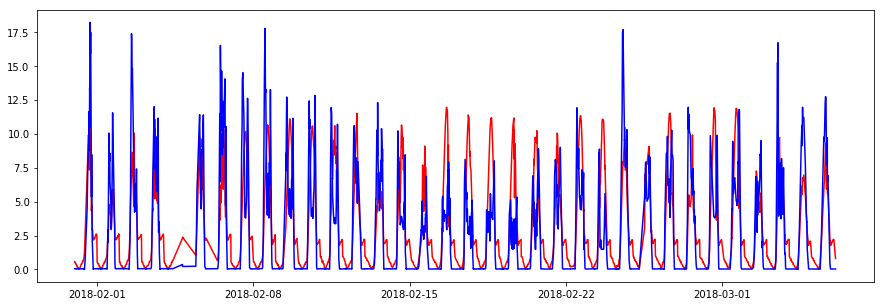

In [31]:
plt.figure(figsize=(15,5))
plt.plot(Test_show['Time'][:2000].values,Test_show['predPowerGeneration'][:2000].apply(abs).values,c='r')
plt.plot(Test_show['Time'][:2000].values,Test_show['actualPowerGeneration'][:2000].values,c='b')
plt.show()

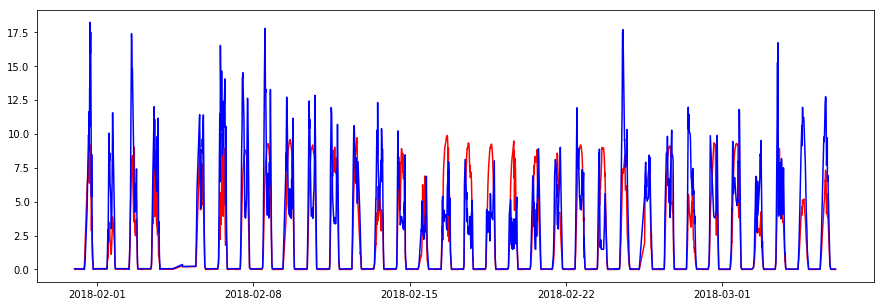

In [34]:
plt.figure(figsize=(15,5))
plt.plot(Test_show['Time'][:2000].values,Test_show['RadiationInclinedPlane'][:2000].apply(lambda x: x/100).values,c='r')
plt.plot(Test_show['Time'][:2000].values,Test_show['actualPowerGeneration'][:2000].values,c='b')
plt.show()